# Sleep Health and Lifestyle

This synthetic dataset contains sleep and cardiovascular metrics as well as lifestyle factors of close to 400 fictive persons.

The workspace is set up with one CSV file, `data.csv`, with the following columns:

- `Person ID`
- `Gender`
- `Age`
- `Occupation`
- `Sleep Duration`: Average number of hours of sleep per day
- `Quality of Sleep`: A subjective rating on a 1-10 scale
- `Physical Activity Level`: Average number of minutes the person engages in physical activity daily
- `Stress Level`: A subjective rating on a 1-10 scale
- `BMI Category`
- `Blood Pressure`: Indicated as systolic pressure over diastolic pressure
- `Heart Rate`: In beats per minute
- `Daily Steps`
- `Sleep Disorder`: One of `None`, `Insomnia` or `Sleep Apnea`

Check out the guiding questions or the scenario described below to get started with this dataset!
Feel free to make this workspace yours by adding and removing cells, or editing any of the existing cells.

Source: [Kaggle](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/)

### 🌎 **Some guiding questions to help you explore this data:**

1. Which factors could contribute to a sleep disorder?
2. Does an increased physical activity level result in a better quality of sleep?
3. Does the presence of a sleep disorder affect the subjective sleep quality metric?

### 📊 **Visualization ideas**
- Boxplot: show the distribution of sleep duration or quality of sleep for each occupation.
- Show the link between age and sleep duration with a scatterplot. Consider including information on the sleep disorder.

### 🔍 **Scenario: Automatically identify potential sleep disorders**

This scenario helps you develop an end-to-end project for your portfolio.

Background: You work for a health insurance company and are tasked to identify whether or not a potential client is likely to have a sleep disorder. The company wants to use this information to determine the premium they want the client to pay.

**Objective**: Construct a classifier to predict the presence of a sleep disorder based on the other columns in the dataset.

Check out our [Linear Classifiers course](https://app.datacamp.com/learn/courses/linear-classifiers-in-python) (Python) or [Supervised Learning course](https://app.datacamp.com/learn/courses/supervised-learning-in-r-classification) (R) for a quick introduction to building classifiers.


You can query the pre-loaded CSV files using SQL directly. Here’s a **sample query**:

# Project

## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data

In [2]:
file_path = r"C:\Users\LENOVO\Desktop\sleep_health_and_life_style\data\data.csv"
data = pd.read_csv(file_path)

In [3]:
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## First Look to Dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [5]:
data['Gender'].value_counts()

Gender
Male      189
Female    185
Name: count, dtype: int64

In [7]:
data['Occupation'].value_counts()

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Scientist                4
Software Engineer        4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

In [10]:
data["Sleep Disorder"].value_counts()

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64

In [12]:
data["Sleep Disorder"].fillna("Healthy", inplace=True)
data["Sleep Disorder"].value_counts()

Sleep Disorder
Healthy        219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

## Feature Engineering

In [13]:
data['is_sleep_disorder'] = data['Sleep Disorder'].apply(lambda x: 1 if x != 'Healthy' else 0)

## Relationships With Sleep Disorder

In [16]:
# Select only the numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Compute the correlation of 'is_sleep_disorder' with other numeric columns
correlation_with_sleep_disorder = numeric_data.corr()['is_sleep_disorder']
correlation_with_sleep_disorder

Person ID                  0.446196
Age                        0.432007
Sleep Duration            -0.338622
Quality of Sleep          -0.310984
Physical Activity Level    0.069787
Stress Level               0.181685
Heart Rate                 0.330254
Daily Steps               -0.026575
is_sleep_disorder          1.000000
Name: is_sleep_disorder, dtype: float64

<Axes: >

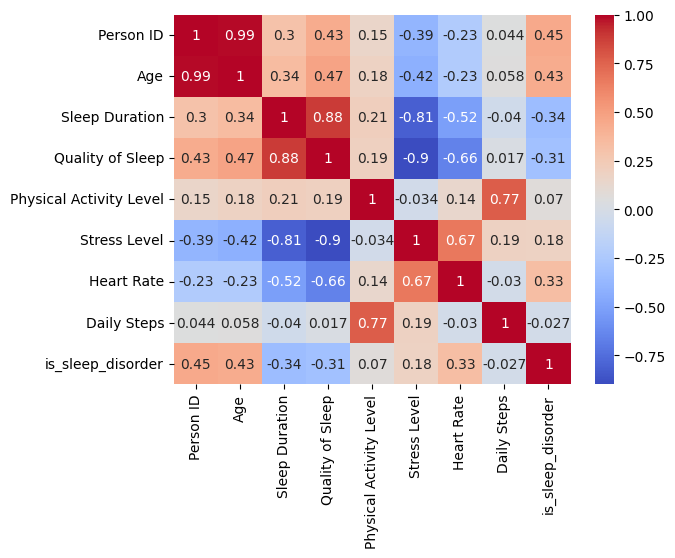

In [17]:
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')